In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_data(data):
    """Read the data from the file."""
    return np.loadtxt(data)

lng = read_data('../pottscpp/lng.txt')

In [5]:
lng = lng[lng[:, 1] > 1]

Text(0, 0.5, 'log($\\Omega$(E))')

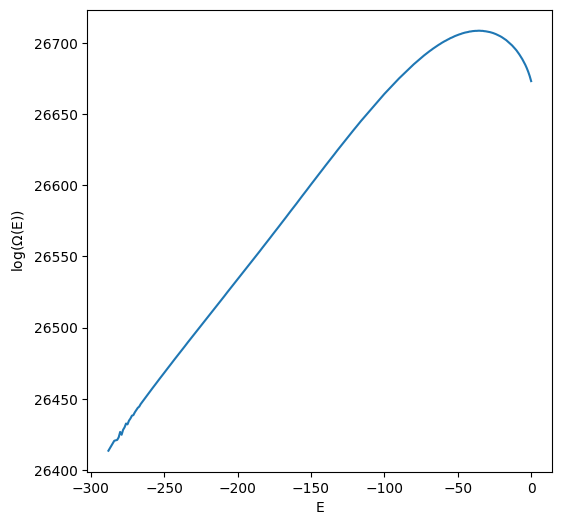

In [13]:
plt.figure(figsize=(6, 6))
plt.plot(lng[:, 0], lng[:, 1])
plt.xlabel('E')
plt.ylabel(r'log($\Omega$(E))')


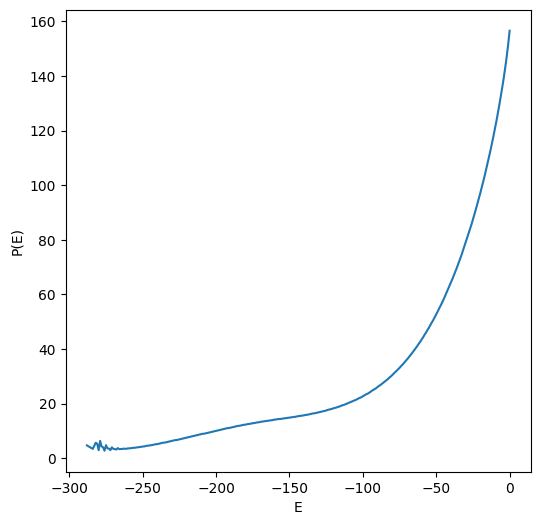

In [31]:

# Example inputs
ln_omega_E = lng[:, 1]
E_levels = lng[:, 0]  # Energy levels
beta = 1/0.7

# Compute log(Boltzmann weights)
ln_boltzmann_weights = ln_omega_E - beta * E_levels

# Use log-sum-exp trick to calculate ln(Z)
max_ln_weight = np.max(ln_boltzmann_weights)
ln_Z = max_ln_weight + np.log(np.sum(np.exp(ln_boltzmann_weights - max_ln_weight)))

# Compute log(P(E)) and then P(E)
ln_P_E = ln_boltzmann_weights - ln_Z
P_E = np.exp(ln_P_E)  # Back to normal space if needed

plt.figure(figsize=(6, 6))
plt.plot(E_levels, -ln_P_E)
plt.xlabel('E')
plt.ylabel('P(E)')
plt.show()


In [22]:
def compute_P(beta, lng):
    ln_omega_E = lng[:, 1]
    E_levels = lng[:, 0]  # Energy levels
    beta = beta

    # Compute log(Boltzmann weights)
    ln_boltzmann_weights = ln_omega_E - beta * E_levels

    # Use log-sum-exp trick to calculate ln(Z)
    max_ln_weight = np.max(ln_boltzmann_weights)
    ln_Z = max_ln_weight + np.log(np.sum(np.exp(ln_boltzmann_weights - max_ln_weight)))

    # Compute log(P(E)) and then P(E)
    ln_P_E = ln_boltzmann_weights - ln_Z
    P_E = np.exp(ln_P_E)  # Back to normal space if needed

    return E_levels, P_E

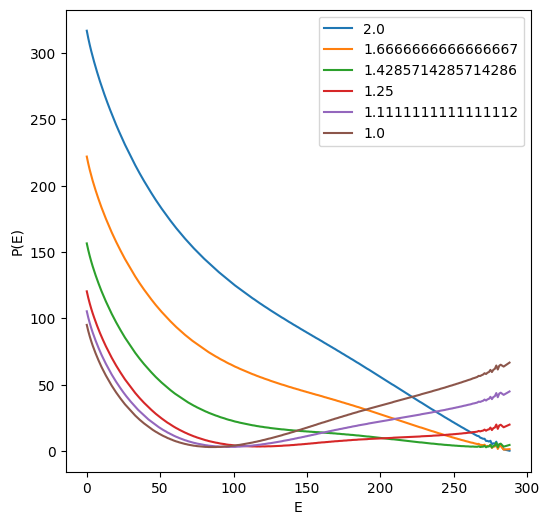

In [34]:
T = np.linspace(0.5, 1, 6)
beta = 1/T
P = []
for b in beta:
    E, P_E = compute_P(b, lng)
    P.append(P_E)

plt.figure(figsize=(6, 6))
for i in range(len(beta)):
    plt.plot(-E, -np.log(P[i]), label=beta[i])
plt.xlabel('E')
plt.ylabel('P(E)')
plt.legend()
plt.show()